In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('TrainingData.csv')
df.head()

,Unnamed: 0,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400277 entries, 0 to 400276
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              400277 non-null  int64  
 1   Function                400277 non-null  object 
 2   Use                     400277 non-null  object 
 3   Sharing                 400277 non-null  object 
 4   Reporting               400277 non-null  object 
 5   Student_Type            400277 non-null  object 
 6   Position_Type           400277 non-null  object 
 7   Object_Type             400277 non-null  object 
 8   Pre_K                   400277 non-null  object 
 9   Operating_Status        400277 non-null  object 
 10  Object_Description      375493 non-null  object 
 11  Text_2                  88217 non-null   object 
 12  SubFund_Description     306855 non-null  object 
 13  Job_Title_Description   292743 non-null  object 
 14  Text_3              

In [5]:
df.describe()

,Unnamed: 0,FTE,Total
count,400277.000000,126071.000000,3.957220e+05
mean,225186.018537,0.426794,1.310586e+04
std,130025.142718,0.573576,3.682254e+05
min,2.000000,-0.087551,-8.746631e+07
25%,112601.000000,0.000792,7.379770e+01
50%,225243.000000,0.130927,4.612300e+02
75%,337722.000000,1.000000,3.652662e+03
max,450340.000000,46.800000,1.297000e+08


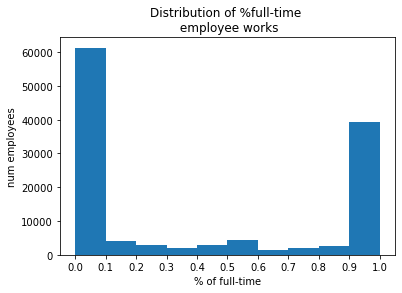

In [6]:
plt.hist(df['FTE'].dropna(),range=[0,1.0])
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

In [7]:
LABELS = ['Function','Use','Sharing','Reporting','Student_Type','Position_Type','Object_Type','Pre_K','Operating_Status']
categorize_label = lambda x: x.astype('category')
df[LABELS] = df[LABELS].apply(categorize_label,axis=0)
df[LABELS].dtypes

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object

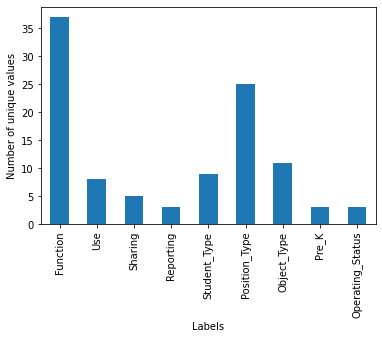

In [8]:
num_unique_labels = df[LABELS].apply(pd.Series.nunique)
num_unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.show()

In [9]:
def compute_log_loss(predicted,actual,eps=1e-14):
    """Computes the logarithmic loss between predicted and actual when these are 10 arrays.
    :param predicted: The predicted probabilities as floats between 0-1.
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted,eps,1-eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                       + (1 - actual)
                       * np.log(1-predicted))
    return loss

In [10]:
print("Log loss: {}".format(compute_log_loss(pd.get_dummies(df[LABELS]),pd.get_dummies(df[LABELS]))))

Log loss: Function_Aides Compensation                       NaN
Function_Career & Academic Counseling             NaN
Function_Communications                           NaN
Function_Curriculum Development                   NaN
Function_Data Processing & Information Services   NaN
                                                   ..
Pre_K_Non PreK                                    NaN
Pre_K_PreK                                        NaN
Operating_Status_Non-Operating                    NaN
Operating_Status_Operating, Not PreK-12           NaN
Operating_Status_PreK-12 Operating                NaN
Length: 104, dtype: float64


In [11]:
from warnings import warn

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [13]:
NUMERIC_COLUMNS = ['FTE','Total']
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)
label_dummies = pd.get_dummies(df[LABELS])
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies, size=0.2, seed=123)

print("X_train info:")
print(X_train.info())
print("\nX_test info:")
print(X_test.info())
print("\ny_train info:")
print(y_train.info())
print("\ny_test info:")
print(y_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 0 to 400276
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FTE     320222 non-null  float64
 1   Total   320222 non-null  float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 4 to 400274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FTE     80055 non-null  float64
 1   Total   80055 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 0 to 400276
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 4 to 400274
Columns: 104 entries, Function_Aides Compensa

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train,y_train)
print("Accuracy: {}".format(clf.score(X_test,y_test)))

Accuracy: 0.0


In [21]:
holdout = pd.read_csv('TestData.csv',index_col=0,low_memory=False)
holdout = holdout[NUMERIC_COLUMNS].fillna(-1000)
predictions = clf.predict_proba(holdout)

In [22]:
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,index=holdout.index,data=predictions)
prediction_df.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
180042,0.036436,0.006444,0.000820,0.020259,0.006421,0.000168,0.031728,0.024914,0.051970,0.000059,...,0.010719,0.037906,0.115584,0.017154,0.830936,0.141207,0.027858,0.167641,0.019894,0.810404
28872,0.036437,0.006444,0.000820,0.020509,0.006504,0.000168,0.031729,0.024914,0.051970,0.000059,...,0.010719,0.037932,0.115584,0.017154,0.830930,0.141217,0.027858,0.168067,0.019894,0.810415
186915,0.078814,0.008539,0.000497,0.233416,0.228242,0.000348,0.015160,0.013368,0.042337,0.000050,...,0.002085,0.129884,0.001852,0.002127,0.500609,0.498311,0.041173,0.428248,0.025170,0.962351
412396,0.078746,0.008542,0.000497,0.171728,0.166265,0.000348,0.015152,0.013361,0.042332,0.000050,...,0.002086,0.127431,0.001852,0.002126,0.500933,0.497622,0.041157,0.405495,0.025190,0.962274
427740,0.078906,0.008535,0.000497,0.339995,0.336461,0.000348,0.015172,0.013377,0.042343,0.000050,...,0.002083,0.133305,0.001852,0.002128,0.500165,0.499254,0.041195,0.459856,0.025143,0.962455


In [52]:
%%time
prediction_df.to_csv('predictions.csv')

Wall time: 10.6 s


In [24]:
BOX_PLOTS_COLUMN_INDICES = [range(0, 37),range(37, 48),range(48, 51),range(51, 76),range(76, 79),range(79, 82),range(82, 87),range(87, 96),range(96, 104)] 

def _multi_multi_log_loss(predicted,
                          actual,
                          class_column_indices=BOX_PLOTS_COLUMN_INDICES,
                          eps=1e-15):
    """ Multi class version of Logarithmic Loss metric as implemented on
        DrivenData.org
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)

    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices].astype(np.float64)

        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions so
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs

    return np.average(class_scores)

In [25]:
PATH_TO_PREDICTIONS = 'predictions.csv'
PATH_TO_HOLDOUT_LABELS = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'

def score_submission(pred_path=PATH_TO_PREDICTIONS, holdout_path=PATH_TO_HOLDOUT_LABELS):
    # this happens on the backend to get the score
    holdout_labels = pd.get_dummies(
                        pd.read_csv(holdout_path, index_col=0)
                          .apply(lambda x: x.astype('category'), axis=0)
                      )

    preds = pd.read_csv(pred_path, index_col=0)
    
    # make sure that format is correct
    assert (preds.columns == holdout_labels.columns).all()
    assert (preds.index == holdout_labels.index).all()

    return _multi_multi_log_loss(preds.values, holdout_labels.values)

In [26]:
from sklearn.metrics import make_scorer
log_loss_scorer = make_scorer(_multi_multi_log_loss)

In [27]:
from sklearn.feature_selection import chi2, SelectKBest

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MaxAbsScaler

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [39]:
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ Takes the dataset as read in, drops the non-feature, non-text columns and
        then combines all of the text columns into a single vector that has all of
        the text for a row.
        
        :param data_frame: The data as read in with read_csv (no preprocessing necessary)
        :param to_drop (optional): Removes the numeric and label columns by default.
    """
    # drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # joins all of the text items in a row (axis=1)
    # with a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [29]:
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [30]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [42]:
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer(lambda x: x['Use'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x['Total'], validate=False)

just_text = get_text_data.fit_transform(df)
just_numeric = get_numeric_data.fit_transform(df)

print('Text Data')
print(just_text.head())
print('\nNumeric Data')
print(just_numeric.head())

Text Data
0    Instruction
1       NO_LABEL
2    Instruction
3    Instruction
4    Instruction
Name: Use, dtype: category
Categories (8, object): ['Business Services', 'ISPD', 'Instruction', 'Leadership', 'NO_LABEL', 'O&M', 'Pupil Services & Enrichment', 'Untracked Budget Set-Aside']

Numeric Data
0    50471.810
1     3477.860
2    62237.130
3       22.300
4       54.166
Name: Total, dtype: float64


In [48]:
dummy_labels = pd.get_dummies(df[LABELS])
NON_LABELS = [c for c in df.columns if c not in LABELS]


X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)


get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [45]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])